# Create templates (=map of patches) for spatial variability
This is the old version because it uses the functions from templates_spv to create all the templates at the same time. 
But we don't want to store in memory all this templates, thus final version creates the templates one at the time when needed.

In [1]:
import time
import numpy as np
import healpy as hp
import yaml
from anytree import Node, RenderTree
import matplotlib.pyplot as plt
from micmac.templates_spv import *

In [2]:
# number of params in the MixingMat if no spv
n_betas = 4*2
n_fgs_comp = 2

# nside of input freq maps
nside_out = 64
# Path to your YAML file
yaml_file_path = 'params_spv_SAT.yaml'

In [3]:
### Reading yaml file with info of spv configuration
dict_params_spv = read_spv_config(yaml_file_path)

# Print the content of the YAML file
for key, value in dict_params_spv.items():
    print(key, "\n", value)

nside_spv 
 {'default': [1], 'f1': {'default': [1], 'b0': {'default': [1]}, 'b1': {'default': None}, 'b2': {'default': None}, 'b3': {'default': None}}, 'f2': {'default': None, 'b0': {'default': None}, 'b1': {'default': None}, 'b2': {'default': None}, 'b3': {'default': None}}}


In [4]:
# Creating the tree
root_tree = tree_spv_config(yaml_file_path, n_betas, n_fgs_comp, print_tree=True)

count_b: 8
n_betas:  8

>>> Tree of spv config as passed by the User:
root
  nside_spv
    default: [1]
    f1
      default: [1]
      b0
        default: [1]
      b1
        default: None
      b2
        default: None
      b3
        default: None
    f2
      default: None
      b0
        default: None
      b1
        default: None
      b2
        default: None
      b3
        default: None

>>> Tree of spv config after filling the missing values:
root
  nside_spv
    default: [1]
    f1
      default: [1]
      b0
        default: [1]
      b1
        default: [1]
      b2
        default: [1]
      b3
        default: [1]
    f2
      default: [1]
      b0
        default: [1]
      b1
        default: [1]
      b2
        default: [1]
      b3
        default: [1]


In [5]:
### Create spv template maps (created all of them w same function)
spv_templates = create_templates_spv_old(root_tree, nside_out, all_nsides=[], spv_templates=[])

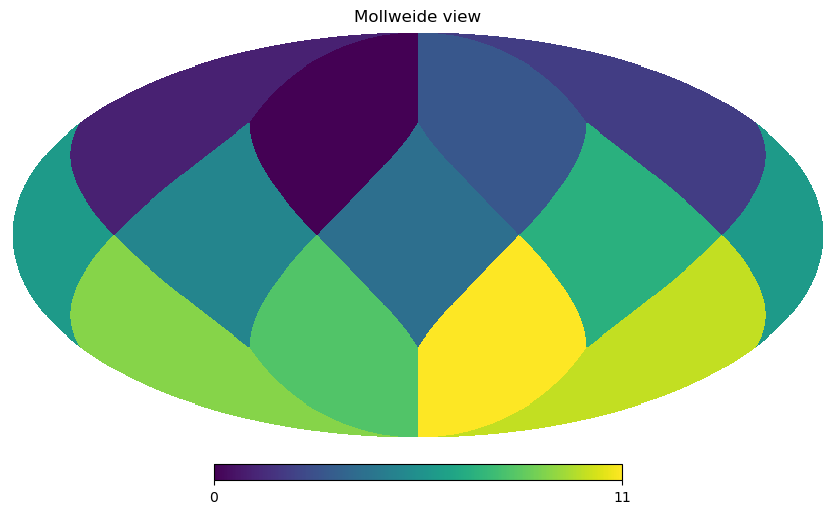

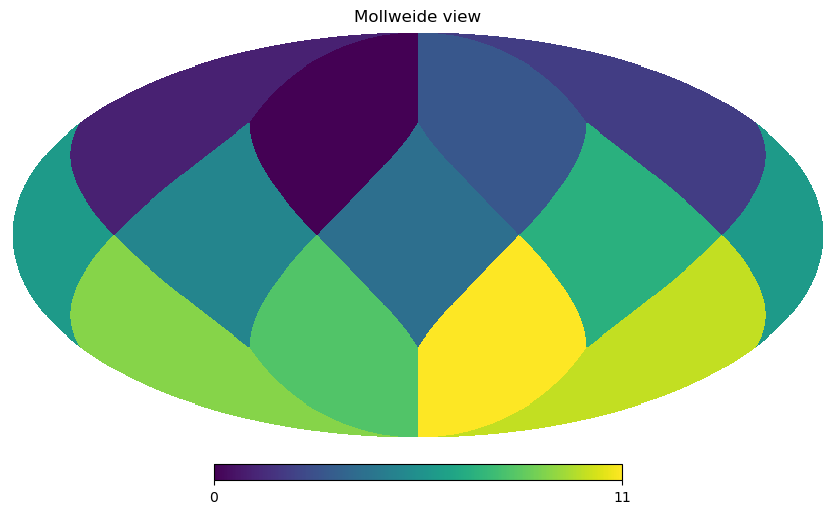

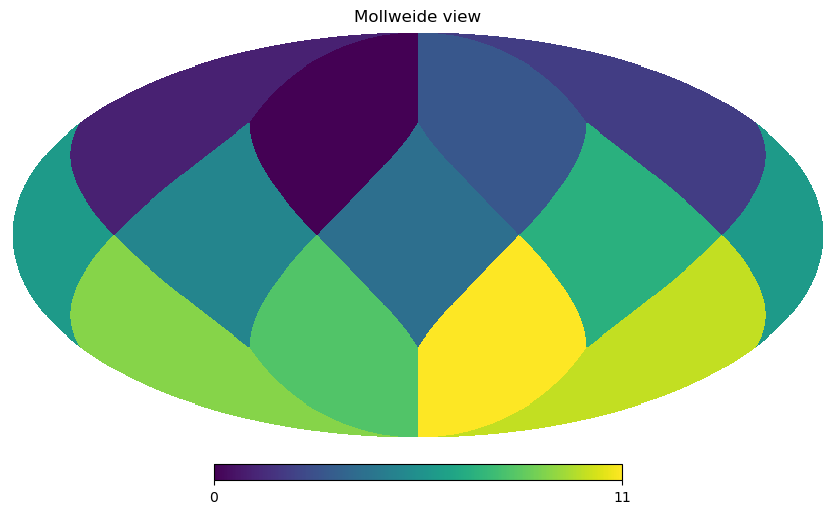

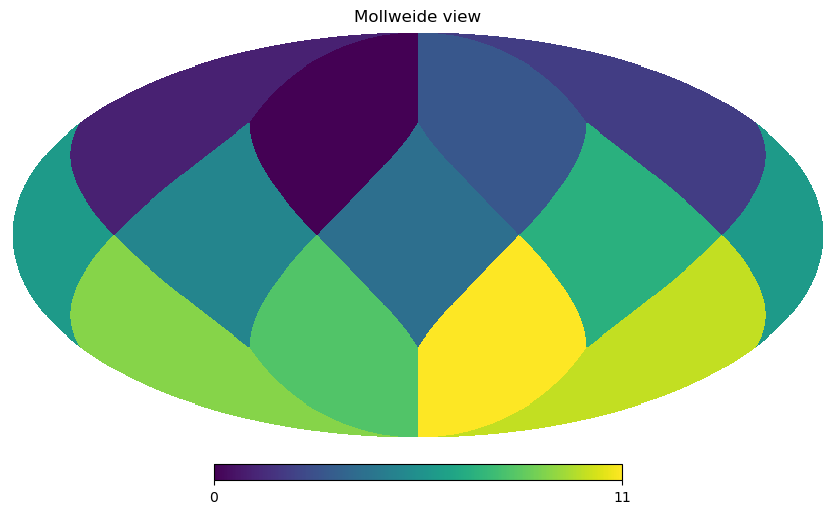

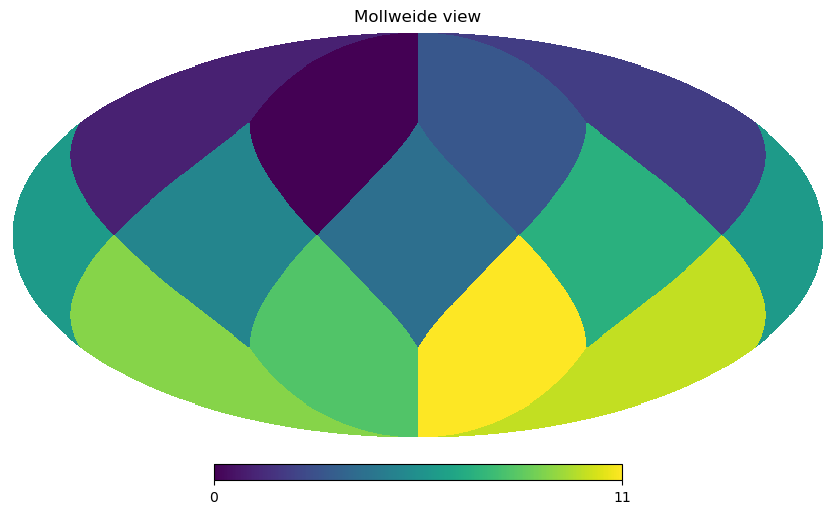

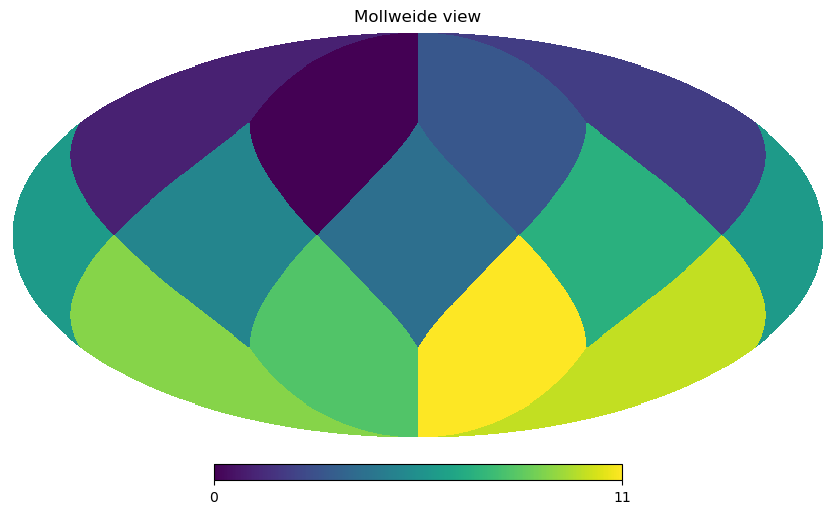

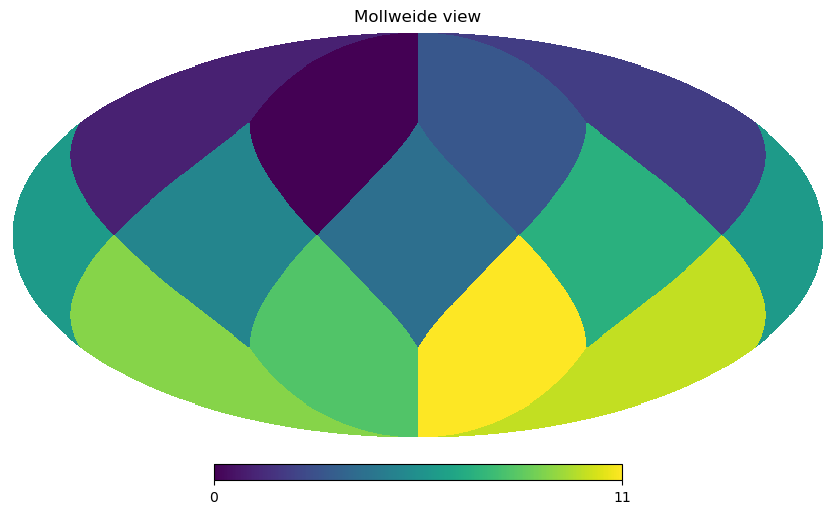

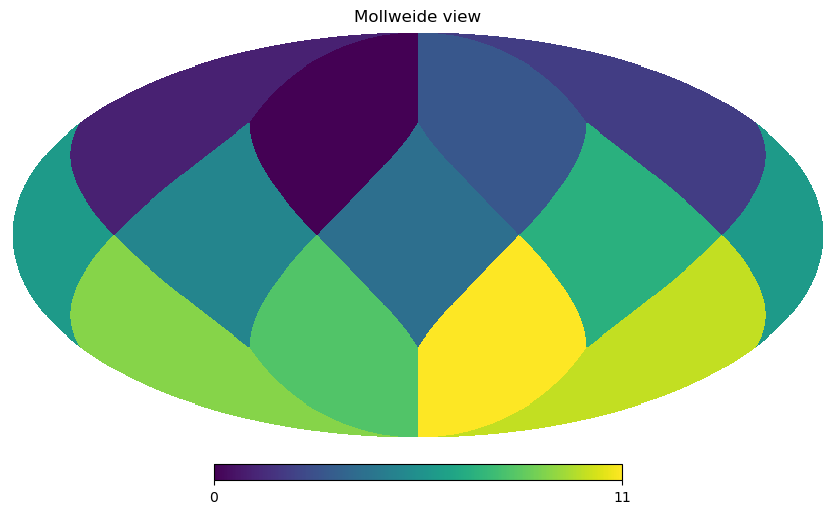

In [6]:
for template in spv_templates:
    hp.mollview(template)
    plt.show()

node:  f1 b0


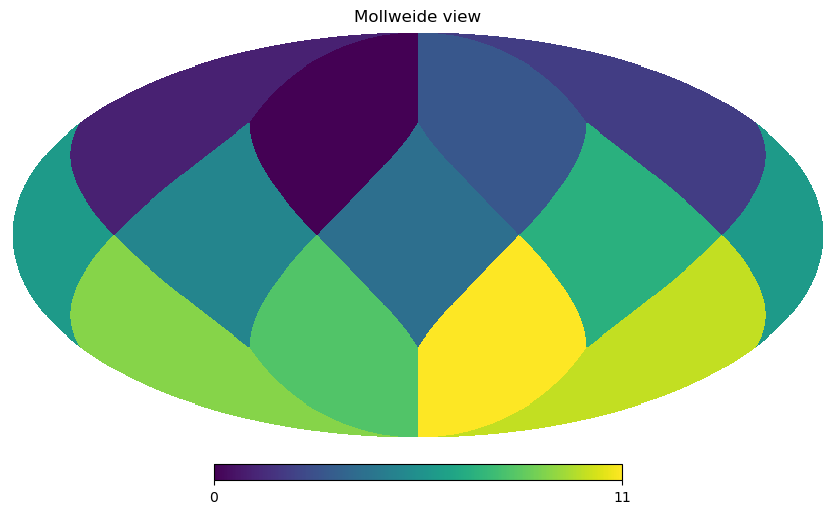

node:  f1 b1


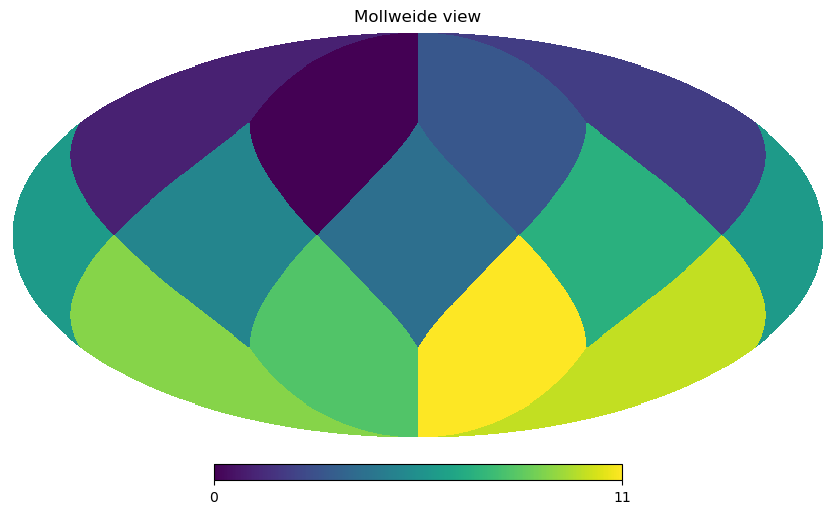

node:  f1 b2


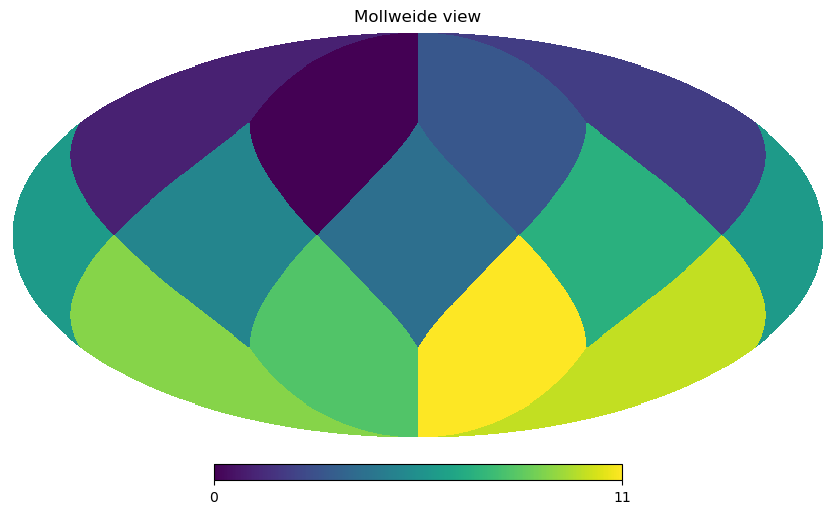

node:  f1 b3


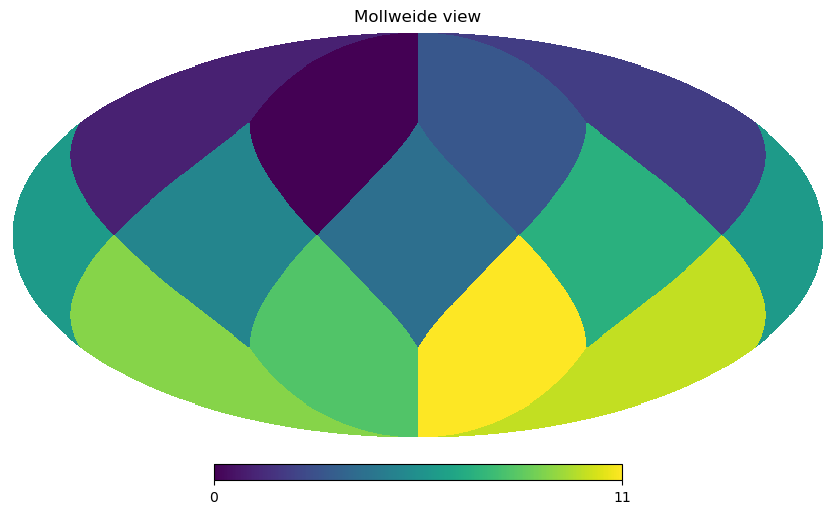

node:  f2 b0


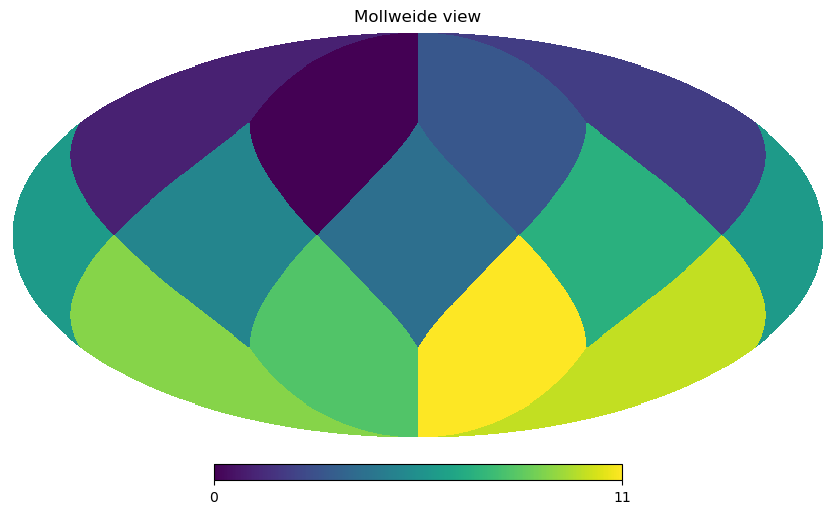

node:  f2 b1


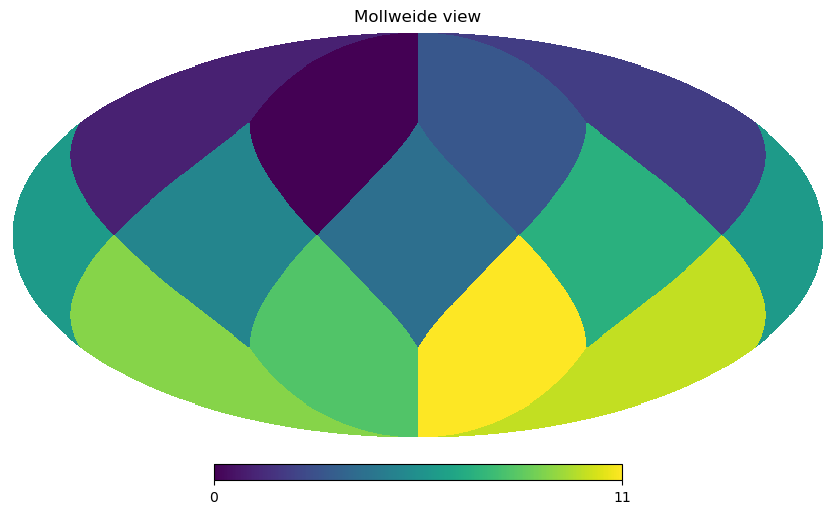

node:  f2 b2


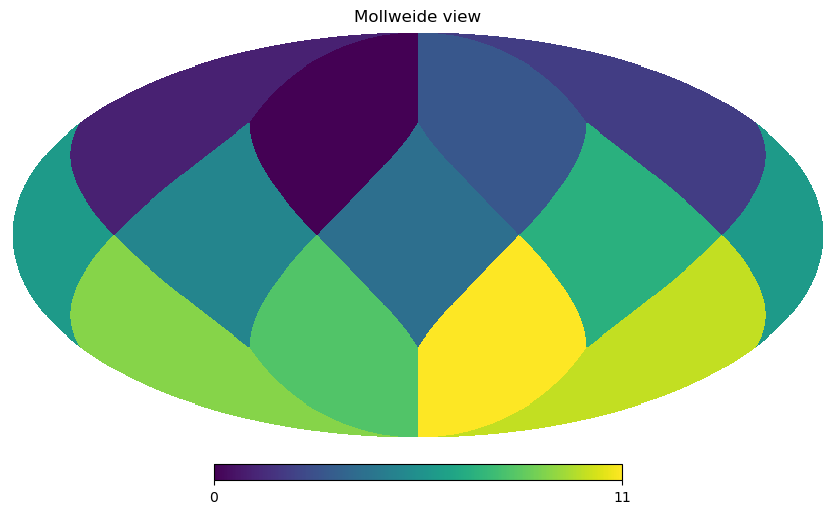

node:  f2 b3


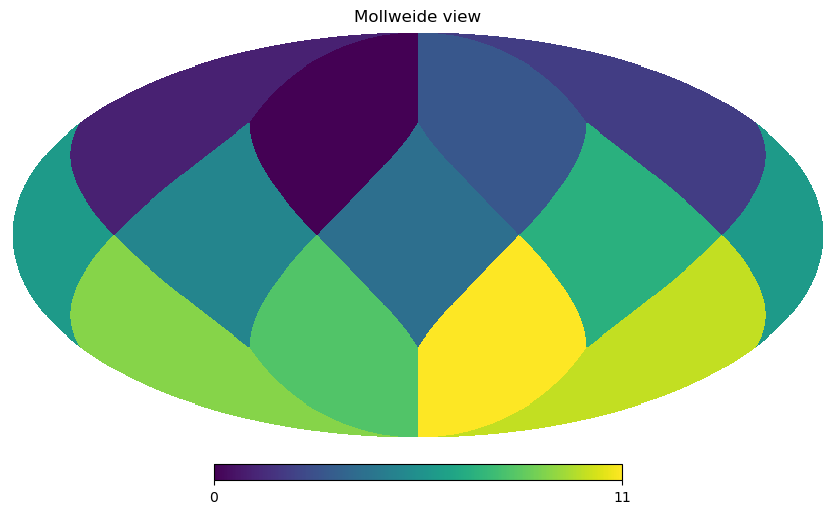

In [7]:
### Create spv template maps (loop on the function to create them one at the time)
nodes_b = get_nodes_b(root_tree)
for node_b in nodes_b:
    print("node: ", node_b.parent.name, node_b.name)
    create_one_template(node_b, nside=nside_out, all_nsides=[], spv_templates=[])
    hp.mollview(template)
    plt.show()